In [ ]:
import pandas as pd


In [ ]:
import numpy as np


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('StudentsPerformance.csv')

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


Text(0.5, 1.02, 'Score Distributions')

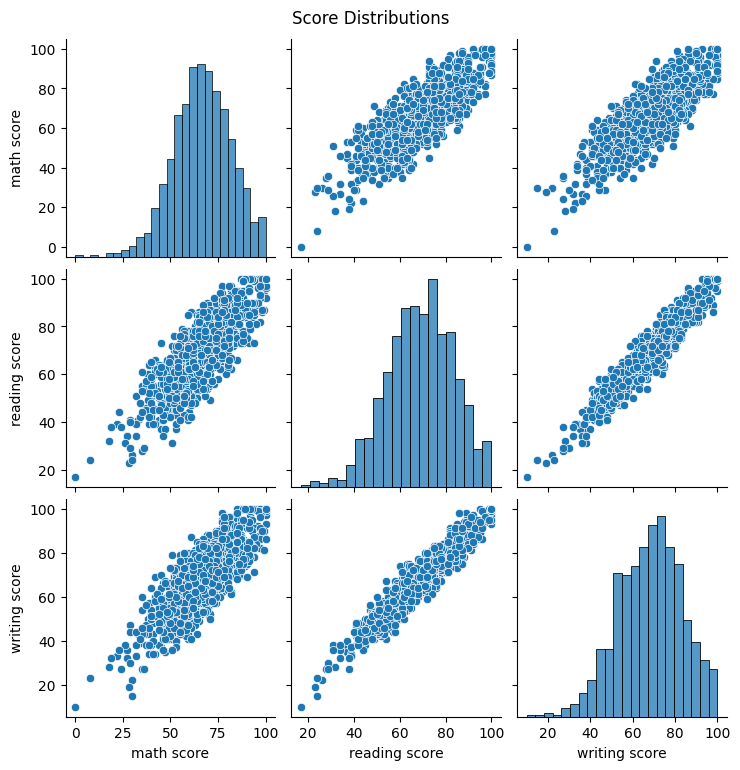

In [ ]:
sns.pairplot(df[['math score', 'reading score', 'writing score']])
plt.suptitle("Score Distributions", y=1.02)

Text(0.5, 1.0, 'Math Score by Gender')

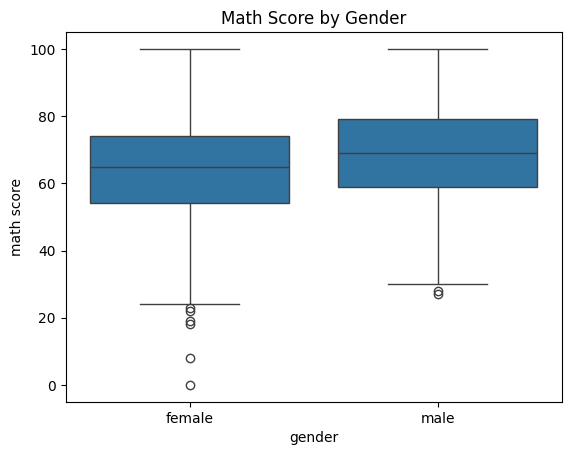

In [ ]:
sns.boxplot(data=df, x='gender', y='math score')
plt.title("Math Score by Gender")

In [ ]:
df['passed'] = df['writing score'].apply(lambda x: 1 if x >= 50 else 0)

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,passed
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,1


In [ ]:
df = df.drop(columns=['writing score'])

In [ ]:
label_encoders = {}
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
X = df.drop('passed', axis=1)
y = df['passed']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.955

In [ ]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.80      0.82        25\n           1       0.97      0.98      0.97       175\n\n    accuracy                           0.95       200\n   macro avg       0.90      0.89      0.90       200\nweighted avg       0.95      0.95      0.95       200\n'

Text(50.722222222222214, 0.5, 'Actual')

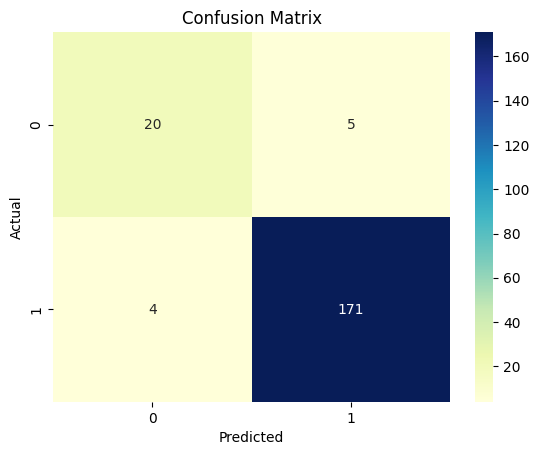

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

Text(0.5, 1.0, 'Correlation Matrix')

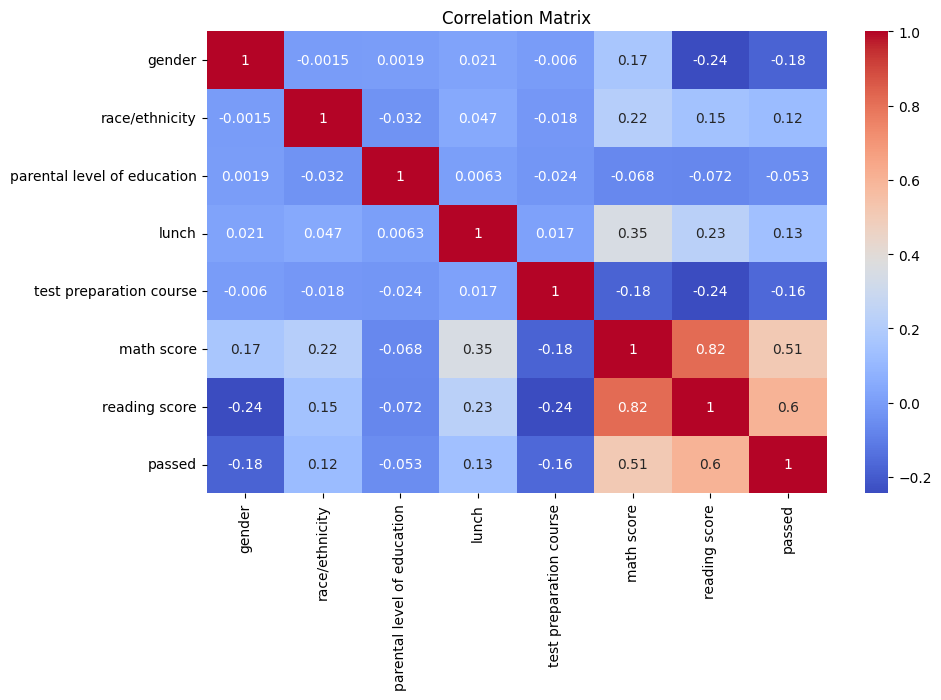

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)

In [ ]:
accuracy_score(y_test, tree_preds)
classification_report(y_test, tree_preds)

'              precision    recall  f1-score   support\n\n           0       0.76      0.76      0.76        25\n           1       0.97      0.97      0.97       175\n\n    accuracy                           0.94       200\n   macro avg       0.86      0.86      0.86       200\nweighted avg       0.94      0.94      0.94       200\n'

In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Load Dataset
def load_dataset(file_path):
    df = pd.read_csv(file_path)
    print("✅ Dataset loaded successfully.")
    print(f"Shape: {df.shape}")
    return df

# Step 2: Split into Train and Test Sets
def split_data(df, target_column=None, test_size=0.2, random_state=42):
    if target_column and target_column in df.columns:
        X = df.drop(columns=[target_column])
        y = df[target_column]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        return X_train, X_test, y_train, y_test
    else:
        train, test = train_test_split(df, test_size=test_size, random_state=random_state)
        return train, test

# Step 3: Perform Basic Data Analysis
def analyze_data(df):
    print("\n📊 Basic Info:")
    print(df.info())

    print("\n📈 Summary Statistics:")
    print(df.describe())

    print("\n🧼 Missing Values:")
    print(df.isnull().sum())

    print("\n🔍 Correlation Matrix:")
    corr = df.corr(numeric_only=True)
    print(corr)

    # Visualization
    print("\n📊 Generating Histograms...")
    df.hist(figsize=(10, 8))
    plt.tight_layout()
    plt.show()

    print("\n📌 Correlation Heatmap:")
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

# === Main Execution ===
if __name__ == "__main__":
    file_path = "your_dataset.csv"  # 🔁 Change to your dataset path
    target_column = None  # 🔁 Set target column name if doing supervised learning

    df = load_dataset(file_path)
    analyze_data(df)

    if target_column:
        X_train, X_test, y_train, y_test = split_data(df, target_column)
    else:
        train, test = split_data(df)

    print("\n✅ Data Split Complete.")
    print(f"Train shape: {train.shape if not target_column else X_train.shape}")
    print(f"Test shape: {test.shape if not target_column else X_test.shape}")


### 📌 Instructions:
Replace "your_dataset.csv" with your actual file path.

If you're doing supervised learning (e.g. classification or regression), set target_column = "your_target_column".###